# Notebook — Spambase: Détection de spam


Le dataset Spambase contient 4601 e-mails étiquetés spam ou non-spam, avec 58 attributs décrivant la fréquence de mots, de caractères et l’usage des majuscules. 

Créé par HP Labs, il sert à entraîner et évaluer des modèles de détection de spam. Il illustre la diversité du spam et les difficultés liées aux faux positifs dans la classification.

### Plan :
1- Chargement et visualisation du dataset

2- Prétraitement des données

3- Entrainement des données

4- Evaluation et comparaison

5- Conclusions

### Imports

In [1]:
import sys
import os

# Ajouter la racine du projet à PYTHONPATH
project_path = os.path.abspath("..")
if project_path not in sys.path:
    sys.path.append(project_path)

print("Chemin ajouté :", project_path)


Chemin ajouté : /Users/aliiii/Desktop/projects/ml-project-ue-a


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.metrics import roc_curve, auc, precision_recall_curve

from src.ml_workflow import * 


### 1- Chargement et visualisation du dataset

In [3]:
import os

spam_path = os.path.join("..", "data", "spambase", "spambase.data")
df = load_data(spam_path)

df.shape, df.head()


Dataset Spambase chargé : 4601 lignes, 58 colonnes
Aperçu des données :
   word_freq_make  word_freq_address  word_freq_all  word_freq_3d  \
0            0.00               0.64           0.64           0.0   
1            0.21               0.28           0.50           0.0   
2            0.06               0.00           0.71           0.0   
3            0.00               0.00           0.00           0.0   
4            0.00               0.00           0.00           0.0   

   word_freq_our  word_freq_over  word_freq_remove  word_freq_internet  \
0           0.32            0.00              0.00                0.00   
1           0.14            0.28              0.21                0.07   
2           1.23            0.19              0.19                0.12   
3           0.63            0.00              0.31                0.63   
4           0.63            0.00              0.31                0.63   

   word_freq_order  word_freq_mail  ...  char_freq_;  char_freq_(  \

((4601, 58),
    word_freq_make  word_freq_address  word_freq_all  word_freq_3d  \
 0            0.00               0.64           0.64           0.0   
 1            0.21               0.28           0.50           0.0   
 2            0.06               0.00           0.71           0.0   
 3            0.00               0.00           0.00           0.0   
 4            0.00               0.00           0.00           0.0   
 
    word_freq_our  word_freq_over  word_freq_remove  word_freq_internet  \
 0           0.32            0.00              0.00                0.00   
 1           0.14            0.28              0.21                0.07   
 2           1.23            0.19              0.19                0.12   
 3           0.63            0.00              0.31                0.63   
 4           0.63            0.00              0.31                0.63   
 
    word_freq_order  word_freq_mail  ...  char_freq_;  char_freq_(  \
 0             0.00            0.00  ...   

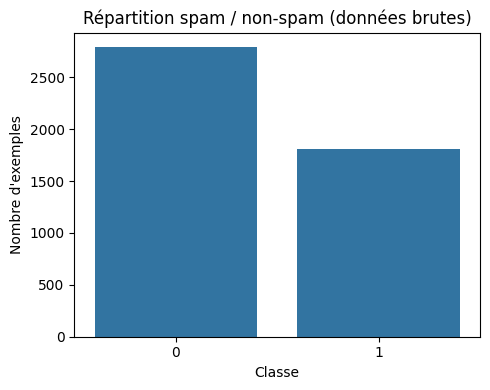

spam
0    0.605955
1    0.394045
Name: proportion, dtype: float64

In [4]:
y_raw = df["spam"]
plot_class_distribution(y_raw, title="Répartition spam / non-spam (données brutes)")
y_raw.value_counts(normalize=True)


In [5]:
# Prétraitement : normalisation + gestion valeurs manquantes
df_clean, pca_model = preprocess_data(df, target_column="spam")


df_clean.shape, df_clean.head()


((4601, 58),
    word_freq_make  word_freq_address  word_freq_all  word_freq_3d  \
 0       -0.342434           0.330885       0.712859       -0.0469   
 1        0.345359           0.051909       0.435130       -0.0469   
 2       -0.145921          -0.165072       0.851723       -0.0469   
 3       -0.342434          -0.165072      -0.556761       -0.0469   
 4       -0.342434          -0.165072      -0.556761       -0.0469   
 
    word_freq_our  word_freq_over  word_freq_remove  word_freq_internet  \
 0       0.011565       -0.350266         -0.291794           -0.262562   
 1      -0.256117        0.672399          0.244743           -0.088010   
 2       1.364846        0.343685          0.193644            0.036670   
 3       0.472573       -0.350266          0.500237            1.308402   
 4       0.472573       -0.350266          0.500237            1.308402   
 
    word_freq_order  word_freq_mail  ...  char_freq_;  char_freq_(  \
 0        -0.323302       -0.371364  ...   

In [9]:
# afficher Le nombre de lignes et de colonnes, le nom et le type de chaque colonne et le nombre de valeurs non nulles
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 58 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   word_freq_make              4601 non-null   float64
 1   word_freq_address           4601 non-null   float64
 2   word_freq_all               4601 non-null   float64
 3   word_freq_3d                4601 non-null   float64
 4   word_freq_our               4601 non-null   float64
 5   word_freq_over              4601 non-null   float64
 6   word_freq_remove            4601 non-null   float64
 7   word_freq_internet          4601 non-null   float64
 8   word_freq_order             4601 non-null   float64
 9   word_freq_mail              4601 non-null   float64
 10  word_freq_receive           4601 non-null   float64
 11  word_freq_will              4601 non-null   float64
 12  word_freq_people            4601 non-null   float64
 13  word_freq_report            4601 

In [10]:
# afficher des statistiques descriptives sur les colonnes
df.describe()


,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
count,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,...,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000
mean,0.104553,0.213015,0.280656,0.065425,0.312223,0.095901,0.114208,0.105295,0.090067,0.239413,...,0.038575,0.139030,0.016976,0.269071,0.075811,0.044238,5.191515,52.172789,283.289285,0.394045
std,0.305358,1.290575,0.504143,1.395151,0.672513,0.273824,0.391441,0.401071,0.278616,0.644755,...,0.243471,0.270355,0.109394,0.815672,0.245882,0.429342,31.729449,194.891310,606.347851,0.488698
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588000,6.000000,35.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.065000,0.000000,0.000000,0.000000,0.000000,2.276000,15.000000,95.000000,0.000000
75%,0.000000,0.000000,0.420000,0.000000,0.380000,0.000000,0.000000,0.000000,0.000000,0.160000,...,0.000000,0.188000,0.000000,0.315000,0.052000,0.000000,3.706000,43.000000,266.000000,1.000000
max,4.540000,14.280000,5.100000,42.810000,10.000000,5.880000,7.270000,11.110000,5.260000,18.180000,...,4.385000,9.752000,4.081000,32.478000,6.003000,19.829000,1102.500000,9989.000000,15841.000000,1.000000


#### Commentaires:
- Le dataset 4601 données d'entrées et 58 attributs dont 57 featues et une classe label. 
- On n'a pas de données manquantes. En effet, on a 0 valeur nulle pour toutes les colonnes du dataset.
- Comme le dataset est équilibré (39,4% de spam), les métriques comme la F1-score et la courbe PR (Precision-Recall) sont particulièrement pertinentes pour évaluer les performances des modèles.

In [ ]:
# afficher la matrice de corrélation 
corr = df.drop(columns=['spam']).corr(method='pearson')
print("La taille de la matrice de corrélation est ",corr.shape)  # Pour vérifier la taille
print("Matrice de corrélation")
display(corr)

La taille de la matrice de corrélation est  (57, 57)
Matrice de corrélation


,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total
word_freq_make,1.000000,-0.016759,0.065627,0.013273,0.023119,0.059674,0.007669,-0.003950,0.106263,0.041198,...,-0.017755,-0.026505,-0.021196,-0.033301,0.058292,0.117419,-0.008844,0.044491,0.061382,0.089165
word_freq_address,-0.016759,1.000000,-0.033526,-0.006923,-0.023760,-0.024840,0.003918,-0.016280,-0.003826,0.032962,...,-0.015747,-0.007282,-0.049837,-0.018527,-0.014461,-0.009605,0.001946,0.002083,0.000271,-0.022680
word_freq_all,0.065627,-0.033526,1.000000,-0.020246,0.077734,0.087564,0.036677,0.012003,0.093786,0.032075,...,-0.026344,-0.033213,-0.016495,-0.033120,0.108140,0.087618,-0.003336,0.097398,0.107463,0.070114
word_freq_3d,0.013273,-0.006923,-0.020246,1.000000,0.003238,-0.010014,0.019784,0.010268,-0.002454,-0.004947,...,-0.001924,-0.000591,-0.012370,-0.007148,-0.003138,0.010862,-0.000298,0.005260,0.022081,0.021369
word_freq_our,0.023119,-0.023760,0.077734,0.003238,1.000000,0.054054,0.147336,0.029598,0.020823,0.034495,...,-0.032005,-0.032759,-0.046361,-0.026390,0.025509,0.041582,0.002016,0.052662,0.052290,0.002492
word_freq_over,0.059674,-0.024840,0.087564,-0.010014,0.054054,1.000000,0.061163,0.079561,0.117438,0.013897,...,-0.031693,-0.019119,-0.008705,-0.015133,0.065043,0.105692,0.019894,-0.010278,0.090172,0.082089
word_freq_remove,0.007669,0.003918,0.036677,0.019784,0.147336,0.061163,1.000000,0.044545,0.050786,0.056809,...,-0.031408,-0.033089,-0.051885,-0.027653,0.053706,0.070127,0.046612,0.041565,0.059677,-0.008344
word_freq_internet,-0.003950,-0.016280,0.012003,0.010268,0.029598,0.079561,0.044545,1.000000,0.105302,0.083129,...,-0.021224,-0.027432,-0.032494,-0.019548,0.031454,0.057910,-0.008012,0.011254,0.037575,0.040252
word_freq_order,0.106263,-0.003826,0.093786,-0.002454,0.020823,0.117438,0.050786,0.105302,1.000000,0.130624,...,-0.026017,-0.014646,-0.031003,0.013601,0.043639,0.149365,-0.000522,0.111308,0.189247,0.248724
word_freq_mail,0.041198,0.032962,0.032075,-0.004947,0.034495,0.013897,0.056809,0.083129,0.130624,1.000000,...,-0.016842,0.011945,0.003936,0.007357,0.036737,0.075786,0.044830,0.073677,0.103308,0.087273


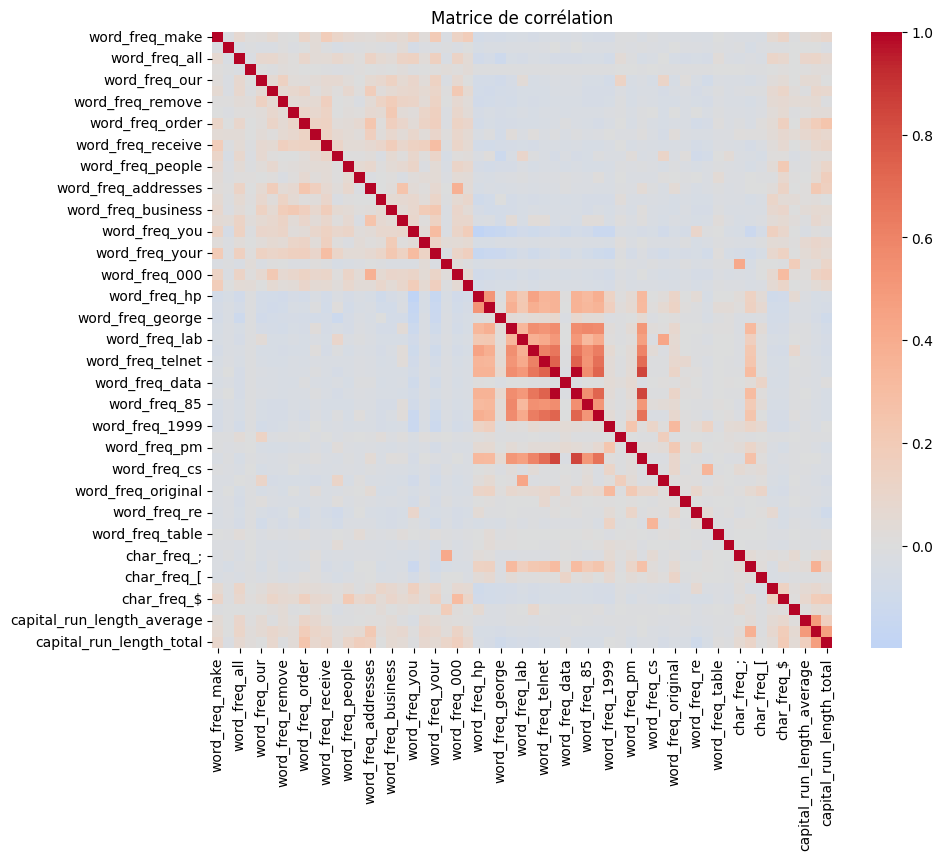

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr, cmap='coolwarm',center=0)
plt.title("Matrice de corrélation")
plt.show()

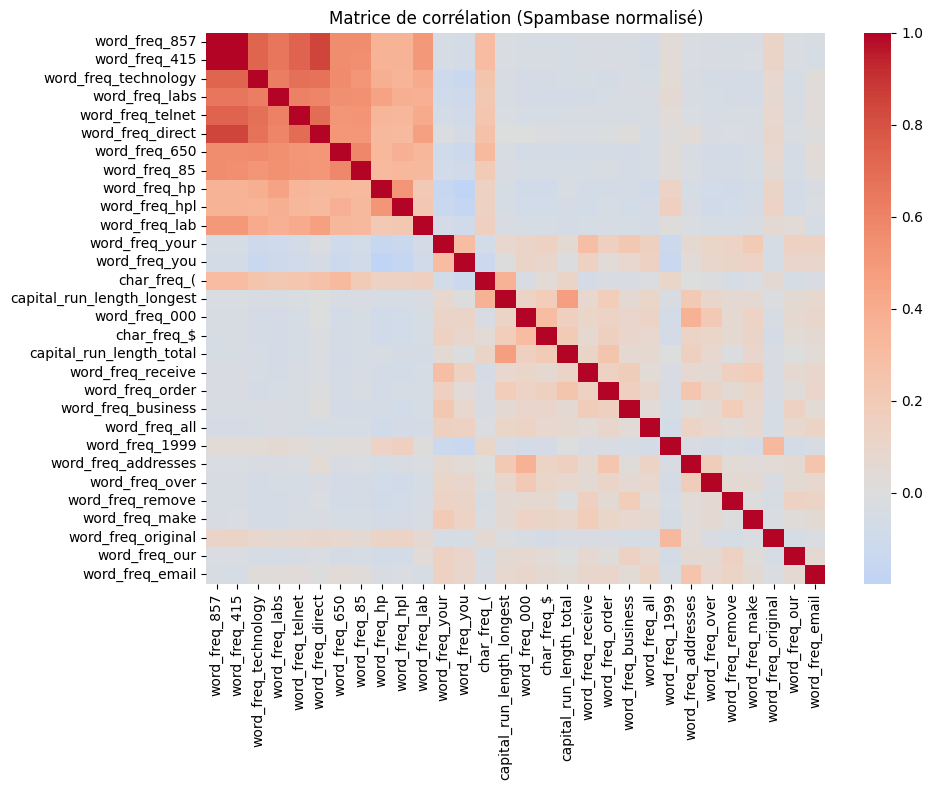

In [22]:
plot_correlation_heatmap(
    df_clean,
    target_column="spam",
    max_features=30,
    title="Matrice de corrélation (Spambase normalisé)"
)


Index(['word_freq_857', 'word_freq_415', 'word_freq_technology',
       'word_freq_labs', 'word_freq_telnet', 'word_freq_direct',
       'word_freq_650', 'word_freq_85', 'word_freq_hp', 'word_freq_hpl'],
      dtype='object')


<Axes: >

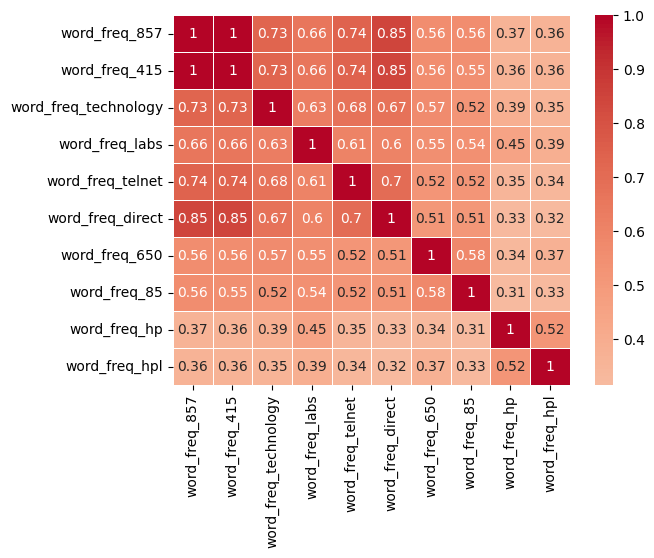

In [ ]:
# visualiser la matrice de corrélation entre les 10 features les plus corrélés
top_features = corr.abs().mean().sort_values(ascending=False).head(10).index
print(top_features)
sns.heatmap(corr.loc[top_features, top_features], annot=True, cmap='coolwarm', center=0,linewidths=0.5)


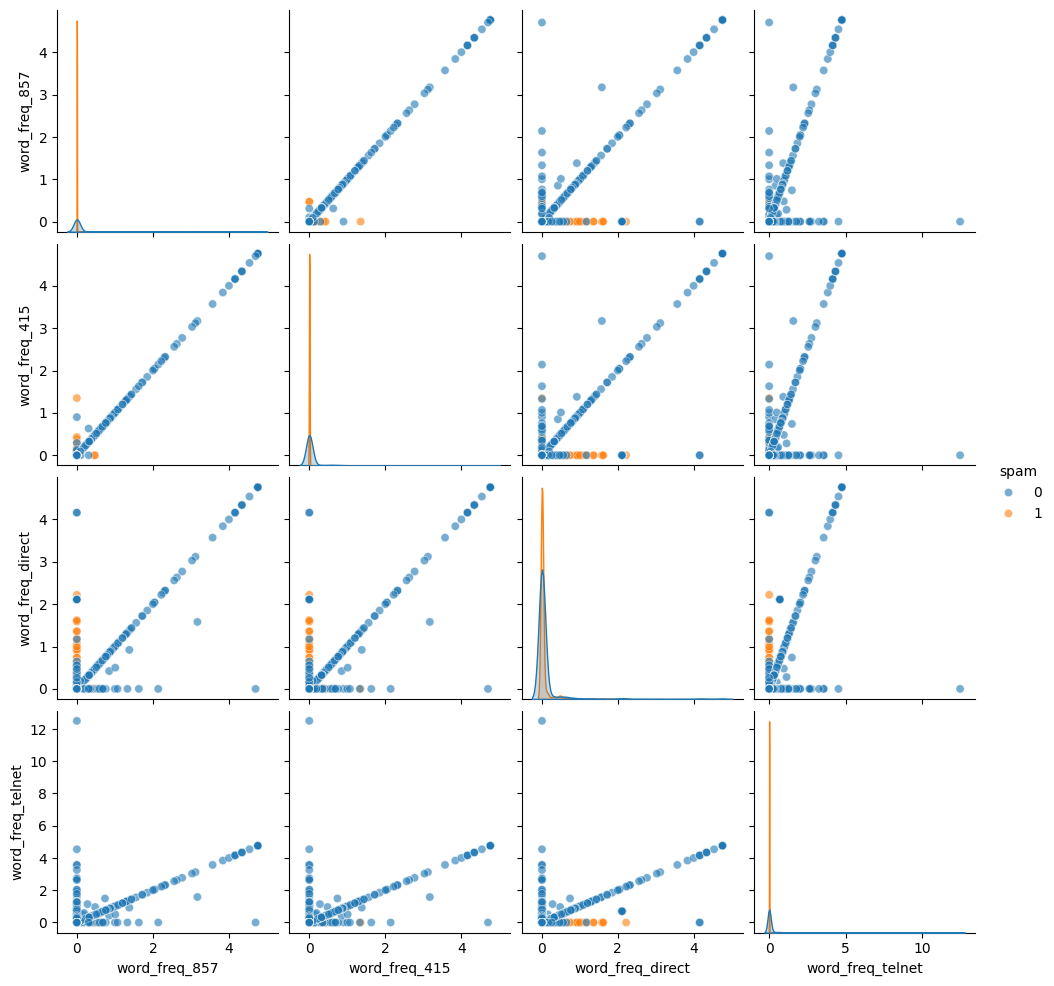

In [ ]:
# visualiser les relations entre plusieurs variables
sns.pairplot(
    df[['word_freq_857', 'word_freq_415', 'word_freq_direct', 'word_freq_telnet', 'spam']],
    hue='spam',
    diag_kind='kde',
    plot_kws={'alpha': 0.6}
)


### Commentaires:
- Le coefficient de corrélation varie de -1 à 1. Si la valeur est proche de 1, cela signifie qu’il existe
une forte corrélation positive entre les deux variables. Lorsqu’il est proche de -1, les variables
ont une forte corrélation négative.
- La matrice de corrélation montre que plusieurs variables présentent des corrélations positives très élevées, notamment word_freq_857, word_freq_415 et word_freq_direct, avec des coefficients dépassant 0.80, ceci est confirmé par les courbes ci-dessus qui montrent des dépendances quasi linéaires entre les variables

### 1er cas: sans PCA

### Prétraitement des données


In [6]:
X_train, X_test, y_train, y_test = split_data(
    df_clean,
    target_column="spam"
)

X_train.shape, X_test.shape

Colonne cible utilisée : 'spam'
Split effectué : 3680 train / 921 test


((3680, 57), (921, 57))

### Entrainement des modèles

In [25]:
models, results = train_models(X_train, X_test, y_train, y_test)

import pandas as pd
pd.DataFrame(results).T


Entraînement du modèle : RandomForest
RandomForest entraîné — Accuracy: 0.947 | F1: 0.931

Entraînement du modèle : KNN
KNN entraîné — Accuracy: 0.906 | F1: 0.876

Entraînement du modèle : NeuralNet


/Users/aliiii/Desktop/projects/ml-project-ue-a/.venv/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/aliiii/Desktop/projects/ml-project-ue-a/.venv/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/aliiii/Desktop/projects/ml-project-ue-a/.venv/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


NeuralNet entraîné — Accuracy: 0.929 | F1: 0.910

Résumé des performances :
RandomForest → Accuracy: 0.947 | F1: 0.931
KNN          → Accuracy: 0.906 | F1: 0.876
NeuralNet    → Accuracy: 0.929 | F1: 0.910


/Users/aliiii/Desktop/projects/ml-project-ue-a/.venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/aliiii/Desktop/projects/ml-project-ue-a/.venv/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/aliiii/Desktop/projects/ml-project-ue-a/.venv/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/aliiii/Desktop/projects/ml-project-ue-a/.venv/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


,accuracy,f1_score
RandomForest,0.946797,0.931276
KNN,0.905537,0.875536
NeuralNet,0.929425,0.909597


### Evaluation des modèles

In [26]:
evaluations = evaluate_models(models, X_test, y_test)



🔍 Évaluation du modèle : RandomForest
Matrice de confusion :
[[540  18]
 [ 31 332]]

Rapport de classification :
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       558
           1       0.95      0.91      0.93       363

    accuracy                           0.95       921
   macro avg       0.95      0.94      0.94       921
weighted avg       0.95      0.95      0.95       921


🔍 Évaluation du modèle : KNN
Matrice de confusion :
[[528  30]
 [ 57 306]]

Rapport de classification :
              precision    recall  f1-score   support

           0       0.90      0.95      0.92       558
           1       0.91      0.84      0.88       363

    accuracy                           0.91       921
   macro avg       0.91      0.89      0.90       921
weighted avg       0.91      0.91      0.90       921


🔍 Évaluation du modèle : NeuralNet
Matrice de confusion :
[[529  29]
 [ 36 327]]

Rapport de classification :
              pr

/Users/aliiii/Desktop/projects/ml-project-ue-a/.venv/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/aliiii/Desktop/projects/ml-project-ue-a/.venv/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/aliiii/Desktop/projects/ml-project-ue-a/.venv/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


/Users/aliiii/Desktop/projects/ml-project-ue-a/.venv/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/aliiii/Desktop/projects/ml-project-ue-a/.venv/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/aliiii/Desktop/projects/ml-project-ue-a/.venv/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


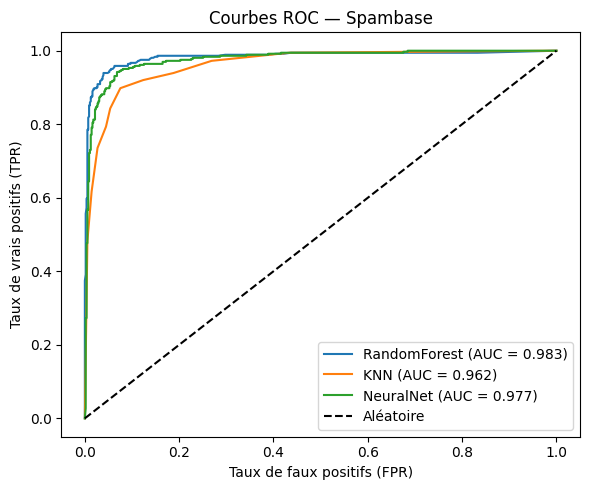

In [27]:
plot_roc_curves(
    models,
    X_test,
    y_test,
    title="Courbes ROC — Spambase"
)


#### Commentaires:
- Pour les trois modèles, AUc est priche de 1, ce qui montre que les modèles distinguent bien les classes
- Le modèle dont la courbe est globalement la plus proche du coin supérieur gauche est meilleur. (True positive poche de 1 et False positive proche de 0)
- Il faut un compromis entre le taux de True positive et False positive car si on se base seulement sur les true positive, on risque d'avoir un taux élevé en false positive

/Users/aliiii/Desktop/projects/ml-project-ue-a/.venv/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/aliiii/Desktop/projects/ml-project-ue-a/.venv/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/aliiii/Desktop/projects/ml-project-ue-a/.venv/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


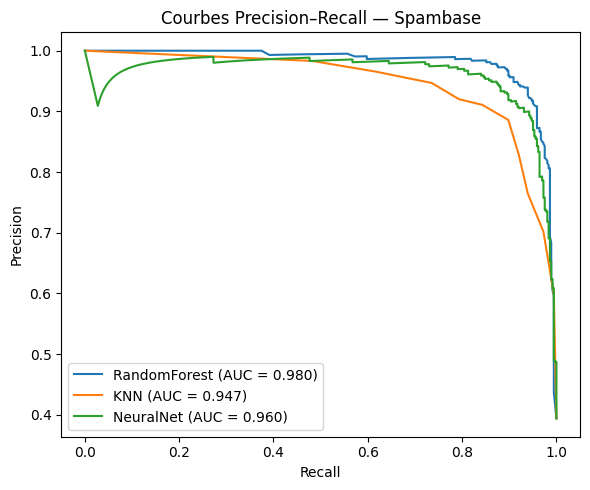

In [28]:
plot_precision_recall_curves(
    models,
    X_test,
    y_test,
    title="Courbes Precision–Recall — Spambase"
)


#### Commentaires:
- Tous les modèles sont très performants pour la majorité des spam, puisque la Précision reste >0.9 jusqu’à Recall ≈ 0.85-0.9.

- La chute finale de Precision montre que atteindre 100 % de Recall coûte beaucoup en faux positifs.


Dans un contexte spam :

- Les faux positifs sont coûteux. Donc, il vaut mieux choisir un seuil avant la chute finale de la courbe pour maintenir la précision élevée.

- Le modèle RandomForest semble le plus robuste et sûr pour ce compromis.


Top 15 variables les plus importantes :
                   Feature  Importance
               char_freq_!    0.114289
               char_freq_$    0.098963
          word_freq_remove    0.063808
capital_run_length_average    0.063731
capital_run_length_longest    0.060287
            word_freq_your    0.057990
              word_freq_hp    0.057800
            word_freq_free    0.057109
  capital_run_length_total    0.054446
             word_freq_you    0.029304
             word_freq_our    0.029115
          word_freq_george    0.027918
           word_freq_money    0.025753
             word_freq_hpl    0.021073
             word_freq_edu    0.020494


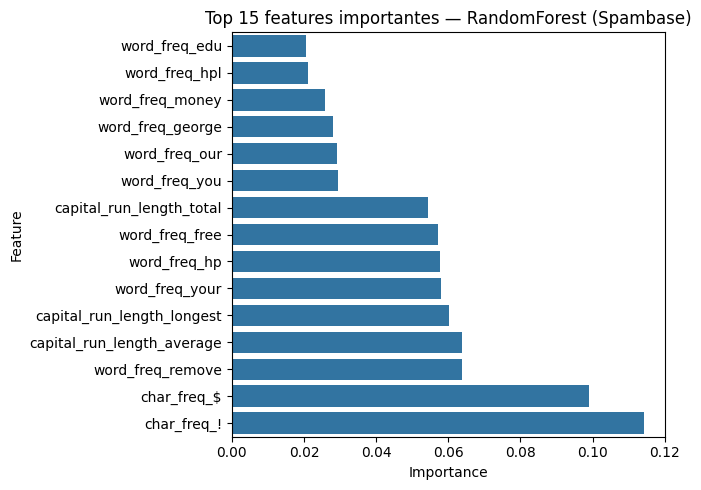

,Feature,Importance
0,char_freq_!,0.114289
1,char_freq_$,0.098963
2,word_freq_remove,0.063808
3,capital_run_length_average,0.063731
4,capital_run_length_longest,0.060287
5,word_freq_your,0.057990
6,word_freq_hp,0.057800
7,word_freq_free,0.057109
8,capital_run_length_total,0.054446
9,word_freq_you,0.029304


In [29]:
rf_model = models["RandomForest"]

top_features = select_features(
    rf_model,
    X_train,
    top_n=15
)

plot_feature_importances_bar(
    top_features,
    title="Top 15 features importantes — RandomForest (Spambase)"
)

top_features


### 2ème cas: avec PCA

### Prétraitement des données


In [5]:
df_clean = preprocess_data(df)


In [22]:
from sklearn.decomposition import PCA
import numpy as np

# On part des features normalisées, sans la colonne cible
features = df_processed.drop(columns=["spam"])


# Vérification rapide : pas de NaN / inf / -inf
X = features.to_numpy()
print("Contient des NaN ?", np.isnan(X).any())
print("Contient des valeurs infinies ?", ~np.isfinite(X).any())


Contient des NaN ? False
Contient des valeurs infinies ? False


/Users/aliiii/Desktop/projects/ml-project-ue-a/.venv/lib/python3.9/site-packages/sklearn/decomposition/_pca.py:606: RuntimeWarning: divide by zero encountered in matmul
  C = X.T @ X
/Users/aliiii/Desktop/projects/ml-project-ue-a/.venv/lib/python3.9/site-packages/sklearn/decomposition/_pca.py:606: RuntimeWarning: overflow encountered in matmul
  C = X.T @ X
/Users/aliiii/Desktop/projects/ml-project-ue-a/.venv/lib/python3.9/site-packages/sklearn/decomposition/_pca.py:606: RuntimeWarning: invalid value encountered in matmul
  C = X.T @ X
/Users/aliiii/Desktop/projects/ml-project-ue-a/.venv/lib/python3.9/site-packages/sklearn/decomposition/_base.py:148: RuntimeWarning: divide by zero encountered in matmul
  X_transformed = X @ self.components_.T
/Users/aliiii/Desktop/projects/ml-project-ue-a/.venv/lib/python3.9/site-packages/sklearn/decomposition/_base.py:148: RuntimeWarning: overflow encountered in matmul
  X_transformed = X @ self.components_.T
/Users/aliiii/Desktop/projects/ml-project-

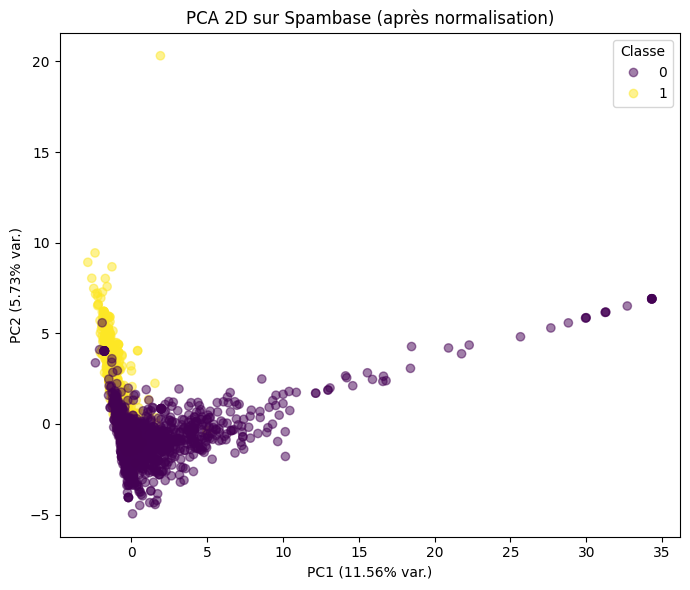

In [32]:
X_pca_input = df_clean.drop(columns=["spam"])
y_pca_input = df_clean["spam"]

plot_pca_2d(
    X_pca_input,
    y_pca_input,
    title="PCA 2D sur Spambase (après normalisation)"
)


/Users/aliiii/Desktop/projects/ml-project-ue-a/.venv/lib/python3.9/site-packages/sklearn/decomposition/_pca.py:606: RuntimeWarning: divide by zero encountered in matmul
  C = X.T @ X
/Users/aliiii/Desktop/projects/ml-project-ue-a/.venv/lib/python3.9/site-packages/sklearn/decomposition/_pca.py:606: RuntimeWarning: overflow encountered in matmul
  C = X.T @ X
/Users/aliiii/Desktop/projects/ml-project-ue-a/.venv/lib/python3.9/site-packages/sklearn/decomposition/_pca.py:606: RuntimeWarning: invalid value encountered in matmul
  C = X.T @ X


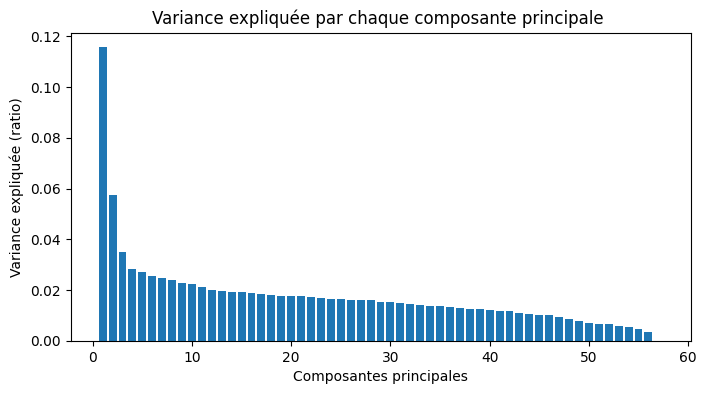

array([1.15647938e-01, 5.73232431e-02, 3.51430162e-02, 2.83010426e-02,
       2.71264533e-02, 2.56585925e-02, 2.48067162e-02, 2.41213829e-02,
       2.27243057e-02, 2.24025230e-02, 2.13495901e-02, 1.98263479e-02,
       1.95049511e-02, 1.92122694e-02, 1.90707479e-02, 1.86573498e-02,
       1.83972439e-02, 1.79540294e-02, 1.77660289e-02, 1.75932423e-02,
       1.74721670e-02, 1.71625291e-02, 1.69216274e-02, 1.65148205e-02,
       1.64313751e-02, 1.62164431e-02, 1.60588919e-02, 1.58708809e-02,
       1.53231701e-02, 1.51929718e-02, 1.46753433e-02, 1.45040605e-02,
       1.39942396e-02, 1.37141146e-02, 1.36249055e-02, 1.32548637e-02,
       1.28785944e-02, 1.26852434e-02, 1.23612373e-02, 1.21027257e-02,
       1.18351676e-02, 1.16841154e-02, 1.08616866e-02, 1.06745828e-02,
       1.02081965e-02, 1.01242658e-02, 9.20092874e-03, 8.57398624e-03,
       7.90050150e-03, 7.17719951e-03, 6.58955516e-03, 6.41601378e-03,
       5.87464653e-03, 5.35757517e-03, 4.56877856e-03, 3.33795195e-03,
      

In [33]:
# Analyse des variances expliquées par les composantes principales

features = df_clean.drop(columns=["spam"])

pca_full = PCA()
pca_full.fit(features)

# Nombre de composantes
n_components = features.shape[1]

plt.figure(figsize=(8, 4))
plt.bar(range(1, n_components + 1), pca_full.explained_variance_ratio_)
plt.xlabel("Composantes principales")
plt.ylabel("Variance expliquée (ratio)")
plt.title("Variance expliquée par chaque composante principale ")
plt.show()

pca_full.explained_variance_ratio_


In [34]:
cumulative_variance = np.cumsum(pca_full.explained_variance_ratio_)
print(cumulative_variance[47])  


0.9527101489160974


In [35]:
 ## Plus globalement, fixons la variance à 90% et trouvons le nb optimal de dimensions

pca_90 = PCA(0.90)
X_reduced90 = pca_90.fit_transform(features)

print(f"Nombre de composantes retenues pour 90% de variance : {pca_90.n_components_}")
print(f"Nombre de features concervées  : {X_reduced90.shape[1]}")


## Si l'on veut concerver 95% de la variance 

pca_95 = PCA(0.95)
X_reduced95 = pca_95.fit_transform(features)

print(f" Nombre de composantes retenues pour 95% de variance : {pca_95.n_components_}")
print(f"Nombre de features concervées : {X_reduced95.shape[1]}")

Nombre de composantes retenues pour 90% de variance : 43
Nombre de features concervées  : 43
 Nombre de composantes retenues pour 95% de variance : 48
Nombre de features concervées : 48


/Users/aliiii/Desktop/projects/ml-project-ue-a/.venv/lib/python3.9/site-packages/sklearn/decomposition/_pca.py:606: RuntimeWarning: divide by zero encountered in matmul
  C = X.T @ X
/Users/aliiii/Desktop/projects/ml-project-ue-a/.venv/lib/python3.9/site-packages/sklearn/decomposition/_pca.py:606: RuntimeWarning: overflow encountered in matmul
  C = X.T @ X
/Users/aliiii/Desktop/projects/ml-project-ue-a/.venv/lib/python3.9/site-packages/sklearn/decomposition/_pca.py:606: RuntimeWarning: invalid value encountered in matmul
  C = X.T @ X
/Users/aliiii/Desktop/projects/ml-project-ue-a/.venv/lib/python3.9/site-packages/sklearn/decomposition/_base.py:148: RuntimeWarning: divide by zero encountered in matmul
  X_transformed = X @ self.components_.T
/Users/aliiii/Desktop/projects/ml-project-ue-a/.venv/lib/python3.9/site-packages/sklearn/decomposition/_base.py:148: RuntimeWarning: overflow encountered in matmul
  X_transformed = X @ self.components_.T
/Users/aliiii/Desktop/projects/ml-project-

#### Commentaires:
- Pour garder entre 90% et 95% de la variance, il faut utiliser entre 43 et 48 composantes ce qui n'est pas un gain très important en dimension
- le PCA réduit un peu la dimensionnalité tout en conservant la quasi-totalité de l’information.

In [7]:
df_processed, pca_model = preprocess_data(
    df,
    target_column="spam",
    apply_pca=True,
    pca_variance=0.95
)

/Users/aliiii/Desktop/projects/ml-project-ue-a/.venv/lib/python3.9/site-packages/sklearn/decomposition/_pca.py:606: RuntimeWarning: divide by zero encountered in matmul
  C = X.T @ X
/Users/aliiii/Desktop/projects/ml-project-ue-a/.venv/lib/python3.9/site-packages/sklearn/decomposition/_pca.py:606: RuntimeWarning: overflow encountered in matmul
  C = X.T @ X
/Users/aliiii/Desktop/projects/ml-project-ue-a/.venv/lib/python3.9/site-packages/sklearn/decomposition/_pca.py:606: RuntimeWarning: invalid value encountered in matmul
  C = X.T @ X
/Users/aliiii/Desktop/projects/ml-project-ue-a/.venv/lib/python3.9/site-packages/sklearn/decomposition/_base.py:148: RuntimeWarning: divide by zero encountered in matmul
  X_transformed = X @ self.components_.T
/Users/aliiii/Desktop/projects/ml-project-ue-a/.venv/lib/python3.9/site-packages/sklearn/decomposition/_base.py:148: RuntimeWarning: overflow encountered in matmul
  X_transformed = X @ self.components_.T
/Users/aliiii/Desktop/projects/ml-project-

In [8]:


X_train, X_test, y_train, y_test = split_data(df_processed, target_column="spam")


Colonne cible utilisée : 'spam'
Split effectué : 3680 train / 921 test


### Entrainement des modèles avec PCA 

In [10]:
models, results = train_models(X_train, X_test, y_train, y_test)



Entraînement du modèle : RandomForest
RandomForest entraîné — Accuracy: 0.924 | F1: 0.902

Entraînement du modèle : KNN
KNN entraîné — Accuracy: 0.904 | F1: 0.874

Entraînement du modèle : NeuralNet


/Users/aliiii/Desktop/projects/ml-project-ue-a/.venv/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/aliiii/Desktop/projects/ml-project-ue-a/.venv/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/aliiii/Desktop/projects/ml-project-ue-a/.venv/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


NeuralNet entraîné — Accuracy: 0.939 | F1: 0.923

Résumé des performances :
RandomForest → Accuracy: 0.924 | F1: 0.902
KNN          → Accuracy: 0.904 | F1: 0.874
NeuralNet    → Accuracy: 0.939 | F1: 0.923


/Users/aliiii/Desktop/projects/ml-project-ue-a/.venv/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/aliiii/Desktop/projects/ml-project-ue-a/.venv/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/aliiii/Desktop/projects/ml-project-ue-a/.venv/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


### Evaluation des modèles avec PCA 

In [13]:
evaluate_models(models, X_test, y_test)



🔍 Évaluation du modèle : RandomForest
Matrice de confusion :
[[528  30]
 [ 40 323]]

Rapport de classification :
              precision    recall  f1-score   support

           0       0.93      0.95      0.94       558
           1       0.92      0.89      0.90       363

    accuracy                           0.92       921
   macro avg       0.92      0.92      0.92       921
weighted avg       0.92      0.92      0.92       921


🔍 Évaluation du modèle : KNN
Matrice de confusion :
[[528  30]
 [ 58 305]]

Rapport de classification :
              precision    recall  f1-score   support

           0       0.90      0.95      0.92       558
           1       0.91      0.84      0.87       363

    accuracy                           0.90       921
   macro avg       0.91      0.89      0.90       921
weighted avg       0.90      0.90      0.90       921


🔍 Évaluation du modèle : NeuralNet
Matrice de confusion :
[[530  28]
 [ 28 335]]

Rapport de classification :
              pr

/Users/aliiii/Desktop/projects/ml-project-ue-a/.venv/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/aliiii/Desktop/projects/ml-project-ue-a/.venv/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/aliiii/Desktop/projects/ml-project-ue-a/.venv/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


{'RandomForest': {'classification_report': {'0': {'precision': 0.9295774647887324,
    'recall': 0.946236559139785,
    'f1-score': 0.9378330373001776,
    'support': 558.0},
   '1': {'precision': 0.9150141643059491,
    'recall': 0.8898071625344353,
    'f1-score': 0.9022346368715084,
    'support': 363.0},
   'accuracy': 0.9239956568946797,
   'macro avg': {'precision': 0.9222958145473408,
    'recall': 0.9180218608371101,
    'f1-score': 0.920033837085843,
    'support': 921.0},
   'weighted avg': {'precision': 0.9238375320251597,
    'recall': 0.9239956568946797,
    'f1-score': 0.9238023973918096,
    'support': 921.0}},
  'confusion_matrix': array([[528,  30],
         [ 40, 323]])},
 'KNN': {'classification_report': {'0': {'precision': 0.9010238907849829,
    'recall': 0.946236559139785,
    'f1-score': 0.9230769230769231,
    'support': 558.0},
   '1': {'precision': 0.9104477611940298,
    'recall': 0.8402203856749312,
    'f1-score': 0.8739255014326648,
    'support': 363.0},


### Sélection des features pour le modèle de RandomForest

In [14]:
model= RandomForestClassifier(random_state=42, n_estimators=800, n_jobs=-1, max_leaf_nodes=24)
model.fit(X_train,y_train)
top_features=select_features(model, X_train, top_n=39)


Top 39 variables les plus importantes :
Feature  Importance
    PC1    0.305267
    PC2    0.275330
    PC3    0.044293
    PC9    0.030999
    PC6    0.022350
    PC4    0.019697
    PC8    0.019303
    PC5    0.018445
   PC13    0.014998
   PC23    0.014196
   PC10    0.013258
   PC32    0.012569
   PC11    0.010803
   PC29    0.010783
   PC48    0.010600
   PC26    0.010218
   PC43    0.009505
   PC25    0.009204
    PC7    0.008731
   PC37    0.007203
   PC14    0.007085
   PC15    0.006996
   PC40    0.006788
   PC46    0.006714
   PC45    0.006644
   PC36    0.006592
   PC41    0.005751
   PC20    0.005227
   PC19    0.005156
   PC42    0.004943
   PC17    0.004710
   PC12    0.004665
   PC44    0.004469
   PC21    0.004405
   PC24    0.004313
   PC38    0.004199
   PC30    0.004074
   PC31    0.004018
   PC39    0.003991


#### Commentaire : On remarque que les deux premières composantes principales (PC1 et PC2) capturent à elles seules plus de 57 % de l’importance totale utilisée par le RandomForest. Cela montre que la PCA compresse bien l’information, mais comme les performances du modèle sans PCA sont déjà très élevées et que la PCA mélange les features d'origine, elle n’apporte pas un avantage significatif dans ce cas précis et complexifie surtout l’interprétation.

#### AVEC LA METHODE DU GRID_SEARCH

On essaie de chercher les meilleurs hyperparametres pour nos modèles : 

In [7]:
from src.ml_workflow import grid_search_model
from sklearn.ensemble import RandomForestClassifier

param_grid = {
    'n_estimators': [50,100,200, 300 , 400 , 500 , 800 , 1000],
    'max_depth': [None, 5, 10 , 15 , 20],
    'min_samples_split': [2,5, 10 , 15]
}

best_model, best_params, best_score = grid_search_model(
    RandomForestClassifier(random_state=42),
    param_grid,
    X_train,
    y_train,
    scoring="f1",
    cv=5
)

y_pred = best_model.predict(X_test)
print(classification_report(y_test, y_pred))


Fitting 5 folds for each of 160 candidates, totalling 800 fits



 Résultats du GridSearchCV :
Meilleurs paramètres : {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 800}
Meilleur score (f1) : 0.9412988173489095
              precision    recall  f1-score   support

           0       0.94      0.97      0.96       558
           1       0.95      0.91      0.93       363

    accuracy                           0.95       921
   macro avg       0.95      0.94      0.94       921
weighted avg       0.95      0.95      0.95       921



In [12]:
from sklearn.neighbors import KNeighborsClassifier

param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9, 11, 15, 21],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]  # Manhattan (L1) ou Euclidienne (L2)
}

best_knn, params_knn, score_knn = grid_search_model(
    KNeighborsClassifier(),
    param_grid_knn,
    X_train,
    y_train,
    scoring="f1",
    cv=5
)

print("Meilleurs paramètres KNN :", params_knn)
print("Score CV F1 :", score_knn)

y_pred_knn = best_knn.predict(X_test)
print(classification_report(y_test, y_pred_knn))


Fitting 5 folds for each of 28 candidates, totalling 140 fits

 Résultats du GridSearchCV :
Meilleurs paramètres : {'n_neighbors': 11, 'p': 2, 'weights': 'distance'}
Meilleur score (f1) : 0.8999273828817206
Meilleurs paramètres KNN : {'n_neighbors': 11, 'p': 2, 'weights': 'distance'}
Score CV F1 : 0.8999273828817206
              precision    recall  f1-score   support

           0       0.93      0.95      0.94       558
           1       0.92      0.90      0.91       363

    accuracy                           0.93       921
   macro avg       0.92      0.92      0.92       921
weighted avg       0.93      0.93      0.93       921



#### LA CROSS VALIDATION pour RandomForest et KNN 

In [9]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=800, random_state=42)

results_rf = cross_validate_model(
    rf,
    X_train,
    y_train,
    cv=5,
    scoring=("accuracy", "recall", "precision", "f1")
)



 Validation croisée pour : RandomForestClassifier
→ Accuracy : 0.9543 ± 0.0135
→ Recall : 0.9310 ± 0.0250
→ Precision : 0.9520 ± 0.0131
→ F1 : 0.9413 ± 0.0177


In [10]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=11)

results_knn = cross_validate_model(
    knn,
    X_train,
    y_train,
    cv=5,
    scoring=("accuracy", "recall", "precision", "f1")
)



 Validation croisée pour : KNeighborsClassifier
→ Accuracy : 0.9035 ± 0.0151
→ Recall : 0.8414 ± 0.0311
→ Precision : 0.9077 ± 0.0250
→ F1 : 0.8728 ± 0.0208


##### Le RandomForest surperforme clairement le KNN sur l’ensemble des métriques, avec une accuracy et un F1 significativement plus élevés et plus stables (faible écart-type).
##### Le KNN reste correct mais montre un recall plus faible et une variabilité plus importante, donc on aura une capacité de généralisation moins robuste que le RandomForest.